In [94]:
#Pandas, numpy for data processing
import pandas as pd
import numpy as np

#sklearn libraries for preprocessing, normalisation, data-splitting
from sklearn import metrics,preprocessing
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score, cross_val_predict

#sklearn Random Forest Classifier and Regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

#matplotlib for plots
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [95]:
#Importing Dataset - Using entire Dataset and model specific Data cleaning
data=pd.read_csv("Dataset/Cleaned_data.csv",header= 0,encoding= 'unicode_escape')

Data Cleaning

In [96]:
data.shape

(180519, 11)

In [97]:
data.isnull().sum()

Order_Date                       0
Order Item Quantity              0
Department Id                    0
Product Category Id              0
Order Customer Id                0
Product Card Id                  0
Days for shipment (scheduled)    0
Order Item Profit Ratio          0
Sales                            0
Order Item Discount Rate         0
Order Item Product Price         0
dtype: int64

In [98]:
train_data=data.copy()
train_data=train_data.drop(columns=['Order_Date'])
train_data.dtypes

Order Item Quantity                int64
Department Id                      int64
Product Category Id                int64
Order Customer Id                  int64
Product Card Id                    int64
Days for shipment (scheduled)    float64
Order Item Profit Ratio          float64
Sales                            float64
Order Item Discount Rate         float64
Order Item Product Price         float64
dtype: object

In [99]:
#Test-train split for prediction of Sales
xs=train_data.loc[:, train_data.columns != 'Sales']
ys=train_data['Sales']
xs_train, xs_test,ys_train,ys_test = train_test_split(xs,ys,test_size = 0.3, random_state = 42)

#Test-train split for prediction of Items Quantity
xq=train_data.loc[:, train_data.columns != 'Order Item Quantity']
yq=train_data['Order Item Quantity']
xq_train, xq_test,yq_train,yq_test = train_test_split(xq,yq,test_size = 0.3, random_state = 42)

In [100]:
scaler=MinMaxScaler()
xs_train=scaler.fit_transform(xs_train)
xs_test=scaler.transform(xs_test)
xq_train=scaler.fit_transform(xq_train)
xq_test=scaler.transform(xq_test)

In [101]:
def regressionmodel(model_s,model_q,xs_train, xs_test,ys_train,ys_test,xq_train, xq_test,yq_train,yq_test):
    model_s=model_s.fit(xs_train,ys_train)
    model_q=model_q.fit(xq_train,yq_train)
    ys_pred=model_s.predict(xs_test)
    yq_pred=model_q.predict(xq_test)
    print('Model parameter used are:',model_s) #Printing the model to see which parameters are used
    print("MAE of sales is         :", metrics.mean_absolute_error(ys_test,ys_pred))
    print("RMSE of sales is        :",np.sqrt(metrics.mean_squared_error(ys_test,ys_pred)))
    return(ys_pred)

In [102]:
model_s = RandomForestRegressor(n_estimators=100,max_depth=10, random_state=40)
model_q = RandomForestRegressor(n_estimators=100,max_depth=10, random_state=40)
ys_pred=regressionmodel(model_s,model_q,xs_train, xs_test,ys_train,ys_test,xq_train, xq_test,yq_train,yq_test)

Model parameter used are: RandomForestRegressor(max_depth=10, random_state=40)
MAE of sales is         : 5.276615181896012e-05
RMSE of sales is        : 0.001567716539502109


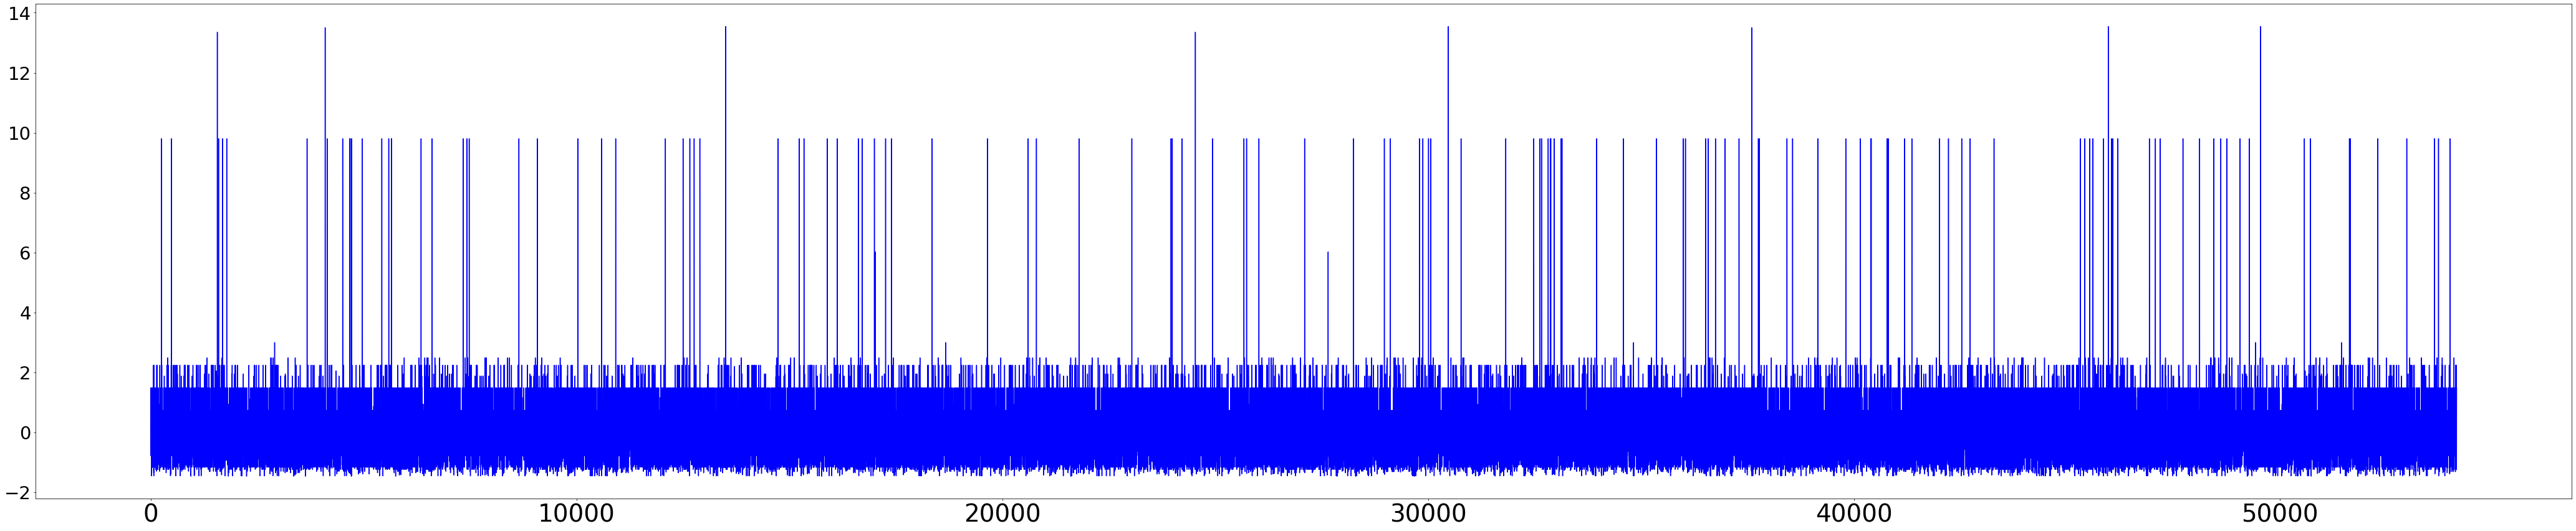

In [103]:
ys_pred = pd.Series(ys_pred)
matplotlib.rcParams['axes.labelsize'] = 60
matplotlib.rcParams['xtick.labelsize'] = 40
matplotlib.rcParams['ytick.labelsize'] = 30
col='Sales'
plt.figure(figsize=(75,15), dpi=70)
ax = plt.gca()
ys_pred.plot(kind='line',y=col+"_forecast",color='blue',ax=ax,)
plt.show()